# Thesis Codes  by Korkut Anapa

# Elsevier Article Codes

# A STATISTICAL MODELLING OF A DISHWASHER CLEANING CYCLE

## Prediction Model

This is a code to predict the CPI, DPI, EC, WC and T of the cleaning cycle of a DW.


In [38]:
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.compose import make_column_selector as selector
from sklearn.cross_decomposition import PLSRegression
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from genetic_selection import GeneticSelectionCV
import time
from xgboost import XGBRegressor

### preparing the data 

In [2]:
df_ref = pd.read_excel('D:/Users/ar600780/OneDrive - ARÇELİK A.Ş/Desktop/dataset_elsevier/dbso60sort.xlsx')

In [3]:
df_ref

,modelname,type,typem,k1,k2,k3,k4,k5,k6,k7,...,10DYFan_Flap,10DYLower_Spray_Circulation_Period,10DYPeriod,10DYRPM,10DYTemperature,10DYTop_Spray_Circulation_Period,10DYUpper_Spray_Circulation_Period,10DYWaiting,10DYWaterInlet,10DYZone_Spray_Circulation_Period
0,E395P320S_AA - Eco 50 - Solo,15,60,E,3,9,5,P,3,2,...,0,0,90,0,0,0,0,10,0,0
1,E295C323S_AA - Eco 50 - Solo,15,60,E,2,9,5,C,3,2,...,0,0,104,0,0,0,0,10,0,0
2,E295F329S - Eco 50 - Solo,15,60,E,2,9,5,F,3,2,...,0,0,104,0,0,0,0,10,0,0
3,E596P3DDS_AA,16,60,E,5,9,6,P,3,D,...,30,0,110,0,0,0,0,50,0,0
4,E596A3IIS_AA,16,60,E,5,9,6,A,3,I,...,29,0,96,0,0,0,0,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,E113B021S - Eco50 - SOLO,13,60,E,1,1,3,B,0,2,...,0,0,103,0,0,0,0,102,0,0
150,E294F328A_AA - Eco 50 NR - Ank.,14,60,E,2,9,4,F,3,2,...,0,0,94,0,0,0,0,20,0,0
151,E213S410S_XD_Eco50 NR_Solo,13,60,E,2,1,3,S,4,1,...,0,0,124,0,0,0,0,123,0,0
152,E394G320S_AA - Eco 50 NR - Solo,14,60,E,3,9,4,G,3,2,...,37,0,109,0,0,0,0,10,0,0


In [4]:
indvar=['1PWClosed_Cycle_Period',
'1PWPeriod',
'1PWCirculation_Period',
'1PWWaterInlet',
'1PWRPM',
'1PWTemperature',
'1PWLower_Spray_Circulation_Period',
'1PWUpper_Spray_Circulation_Period',
'1PWTop_Spray_Circulation_Period',
'1PWZone_Spray_Circulation_Period',
'1PWWaiting',
'1PWFan',
'1PWDoor_Openening',
'1PWFan_Flap',
'1PWExtra_Heater_Offset',
'1PWExtra_Heater_Nonoffset',
'2MWClosed_Cycle_Period',
'2MWPeriod',
'2MWCirculation_Period',
'2MWWaterInlet',
'2MWRPM',
'2MWTemperature',
'2MWLower_Spray_Circulation_Period',
'2MWUpper_Spray_Circulation_Period',
'2MWTop_Spray_Circulation_Period',
'2MWZone_Spray_Circulation_Period',
'2MWWaiting',
'2MWFan',
'2MWDoor_Openening',
'2MWFan_Flap',
'2MWExtra_Heater_Offset',
'2MWExtra_Heater_Nonoffset',
'3MFClosed_Cycle_Period',
'3MFPeriod',
'3MFCirculation_Period',
'3MFWaterInlet',
'3MFRPM',
'3MFTemperature',
'3MFLower_Spray_Circulation_Period',
'3MFUpper_Spray_Circulation_Period',
'3MFTop_Spray_Circulation_Period',
'3MFZone_Spray_Circulation_Period',
'3MFWaiting',
'3MFFan',
'3MFDoor_Openening',
'3MFFan_Flap',
'3MFExtra_Heater_Offset',
'3MFExtra_Heater_Nonoffset',
'4CRClosed_Cycle_Period',
'4CRPeriod',
'4CRCirculation_Period',
'4CRWaterInlet',
'4CRRPM',
'4CRTemperature',
'4CRLower_Spray_Circulation_Period',
'4CRUpper_Spray_Circulation_Period',
'4CRTop_Spray_Circulation_Period',
'4CRZone_Spray_Circulation_Period',
'4CRWaiting',
'4CRFan',
'4CRDoor_Openening',
'4CRFan_Flap',
'4CRExtra_Heater_Offset',
'4CRExtra_Heater_Nonoffset',
'5ERClosed_Cycle_Period',
'5ERPeriod',
'5ERCirculation_Period',
'5ERWaterInlet',
'5ERRPM',
'5ERTemperature',
'5ERLower_Spray_Circulation_Period',
'5ERUpper_Spray_Circulation_Period',
'5ERTop_Spray_Circulation_Period',
'5ERZone_Spray_Circulation_Period',
'5ERWaiting',
'5ERFan',
'5ERDoor_Openening',
'5ERFan_Flap',
'5ERExtra_Heater_Offset',
'5ERExtra_Heater_Nonoffset',
'6HRClosed_Cycle_Period',
'6HRPeriod',
'6HRCirculation_Period',
'6HRWaterInlet',
'6HRRPM',
'6HRTemperature',
'6HRLower_Spray_Circulation_Period',
'6HRUpper_Spray_Circulation_Period',
'6HRTop_Spray_Circulation_Period',
'6HRZone_Spray_Circulation_Period',
'6HRWaiting',
'6HRFan',
'6HRDoor_Openening',
'6HRFan_Flap',
'6HRExtra_Heater_Offset',
'6HRExtra_Heater_Nonoffset',
'7RSClosed_Cycle_Period',
'7RSPeriod',
'7RSCirculation_Period',
'7RSWaterInlet',
'7RSRPM',
'7RSTemperature',
'7RSLower_Spray_Circulation_Period',
'7RSUpper_Spray_Circulation_Period',
'7RSTop_Spray_Circulation_Period',
'7RSZone_Spray_Circulation_Period',
'7RSWaiting',
'7RSFan',
'7RSDoor_Openening',
'7RSFan_Flap',
'7RSExtra_Heater_Offset',
'7RSExtra_Heater_Nonoffset',
'8DSClosed_Cycle_Period',
'8DSPeriod',
'8DSCirculation_Period',
'8DSWaterInlet',
'8DSRPM',
'8DSTemperature',
'8DSLower_Spray_Circulation_Period',
'8DSUpper_Spray_Circulation_Period',
'8DSTop_Spray_Circulation_Period',
'8DSZone_Spray_Circulation_Period',
'8DSWaiting',
'8DSFan',
'8DSDoor_Openening',
'8DSFan_Flap',
'8DSExtra_Heater_Offset',
'8DSExtra_Heater_Nonoffset',
'9RYClosed_Cycle_Period',
'9RYPeriod',
'9RYCirculation_Period',
'9RYWaterInlet',
'9RYRPM',
'9RYTemperature',
'9RYLower_Spray_Circulation_Period',
'9RYUpper_Spray_Circulation_Period',
'9RYTop_Spray_Circulation_Period',
'9RYZone_Spray_Circulation_Period',
'9RYWaiting',
'9RYFan',
'9RYDoor_Openening',
'9RYFan_Flap',
'9RYExtra_Heater_Offset',
'9RYExtra_Heater_Nonoffset',
'10DYClosed_Cycle_Period',
'10DYPeriod',
'10DYCirculation_Period',
'10DYWaterInlet',
'10DYRPM',
'10DYTemperature',
'10DYLower_Spray_Circulation_Period',
'10DYUpper_Spray_Circulation_Period',
'10DYTop_Spray_Circulation_Period',
'10DYZone_Spray_Circulation_Period',
'10DYWaiting',
'10DYFan',
'10DYDoor_Openening',
'10DYFan_Flap',
'10DYExtra_Heater_Offset',
'10DYExtra_Heater_Nonoffset']



In [5]:
data=['CPI','DPI','EC','T','WC',
     '1PWClosed_Cycle_Period',
'1PWPeriod',
'1PWCirculation_Period',
'1PWWaterInlet',
'1PWRPM',
'1PWTemperature',
'1PWLower_Spray_Circulation_Period',
'1PWUpper_Spray_Circulation_Period',
'1PWTop_Spray_Circulation_Period',
'1PWZone_Spray_Circulation_Period',
'1PWWaiting',
'1PWFan',
'1PWDoor_Openening',
'1PWFan_Flap',
'1PWExtra_Heater_Offset',
'1PWExtra_Heater_Nonoffset',
'2MWClosed_Cycle_Period',
'2MWPeriod',
'2MWCirculation_Period',
'2MWWaterInlet',
'2MWRPM',
'2MWTemperature',
'2MWLower_Spray_Circulation_Period',
'2MWUpper_Spray_Circulation_Period',
'2MWTop_Spray_Circulation_Period',
'2MWZone_Spray_Circulation_Period',
'2MWWaiting',
'2MWFan',
'2MWDoor_Openening',
'2MWFan_Flap',
'2MWExtra_Heater_Offset',
'2MWExtra_Heater_Nonoffset',
'3MFClosed_Cycle_Period',
'3MFPeriod',
'3MFCirculation_Period',
'3MFWaterInlet',
'3MFRPM',
'3MFTemperature',
'3MFLower_Spray_Circulation_Period',
'3MFUpper_Spray_Circulation_Period',
'3MFTop_Spray_Circulation_Period',
'3MFZone_Spray_Circulation_Period',
'3MFWaiting',
'3MFFan',
'3MFDoor_Openening',
'3MFFan_Flap',
'3MFExtra_Heater_Offset',
'3MFExtra_Heater_Nonoffset',
'4CRClosed_Cycle_Period',
'4CRPeriod',
'4CRCirculation_Period',
'4CRWaterInlet',
'4CRRPM',
'4CRTemperature',
'4CRLower_Spray_Circulation_Period',
'4CRUpper_Spray_Circulation_Period',
'4CRTop_Spray_Circulation_Period',
'4CRZone_Spray_Circulation_Period',
'4CRWaiting',
'4CRFan',
'4CRDoor_Openening',
'4CRFan_Flap',
'4CRExtra_Heater_Offset',
'4CRExtra_Heater_Nonoffset',
'5ERClosed_Cycle_Period',
'5ERPeriod',
'5ERCirculation_Period',
'5ERWaterInlet',
'5ERRPM',
'5ERTemperature',
'5ERLower_Spray_Circulation_Period',
'5ERUpper_Spray_Circulation_Period',
'5ERTop_Spray_Circulation_Period',
'5ERZone_Spray_Circulation_Period',
'5ERWaiting',
'5ERFan',
'5ERDoor_Openening',
'5ERFan_Flap',
'5ERExtra_Heater_Offset',
'5ERExtra_Heater_Nonoffset',
'6HRClosed_Cycle_Period',
'6HRPeriod',
'6HRCirculation_Period',
'6HRWaterInlet',
'6HRRPM',
'6HRTemperature',
'6HRLower_Spray_Circulation_Period',
'6HRUpper_Spray_Circulation_Period',
'6HRTop_Spray_Circulation_Period',
'6HRZone_Spray_Circulation_Period',
'6HRWaiting',
'6HRFan',
'6HRDoor_Openening',
'6HRFan_Flap',
'6HRExtra_Heater_Offset',
'6HRExtra_Heater_Nonoffset',
'7RSClosed_Cycle_Period',
'7RSPeriod',
'7RSCirculation_Period',
'7RSWaterInlet',
'7RSRPM',
'7RSTemperature',
'7RSLower_Spray_Circulation_Period',
'7RSUpper_Spray_Circulation_Period',
'7RSTop_Spray_Circulation_Period',
'7RSZone_Spray_Circulation_Period',
'7RSWaiting',
'7RSFan',
'7RSDoor_Openening',
'7RSFan_Flap',
'7RSExtra_Heater_Offset',
'7RSExtra_Heater_Nonoffset',
'8DSClosed_Cycle_Period',
'8DSPeriod',
'8DSCirculation_Period',
'8DSWaterInlet',
'8DSRPM',
'8DSTemperature',
'8DSLower_Spray_Circulation_Period',
'8DSUpper_Spray_Circulation_Period',
'8DSTop_Spray_Circulation_Period',
'8DSZone_Spray_Circulation_Period',
'8DSWaiting',
'8DSFan',
'8DSDoor_Openening',
'8DSFan_Flap',
'8DSExtra_Heater_Offset',
'8DSExtra_Heater_Nonoffset',
'9RYClosed_Cycle_Period',
'9RYPeriod',
'9RYCirculation_Period',
'9RYWaterInlet',
'9RYRPM',
'9RYTemperature',
'9RYLower_Spray_Circulation_Period',
'9RYUpper_Spray_Circulation_Period',
'9RYTop_Spray_Circulation_Period',
'9RYZone_Spray_Circulation_Period',
'9RYWaiting',
'9RYFan',
'9RYDoor_Openening',
'9RYFan_Flap',
'9RYExtra_Heater_Offset',
'9RYExtra_Heater_Nonoffset',
'10DYClosed_Cycle_Period',
'10DYPeriod',
'10DYCirculation_Period',
'10DYWaterInlet',
'10DYRPM',
'10DYTemperature',
'10DYLower_Spray_Circulation_Period',
'10DYUpper_Spray_Circulation_Period',
'10DYTop_Spray_Circulation_Period',
'10DYZone_Spray_Circulation_Period',
'10DYWaiting',
'10DYFan',
'10DYDoor_Openening',
'10DYFan_Flap',
'10DYExtra_Heater_Offset',
'10DYExtra_Heater_Nonoffset']

In [6]:
df=df_ref[data]

df is our reference data. It consists of all the experiments of 60cm dishwashers

In [7]:
df

,CPI,DPI,EC,T,WC,1PWClosed_Cycle_Period,1PWPeriod,1PWCirculation_Period,1PWWaterInlet,1PWRPM,...,10DYLower_Spray_Circulation_Period,10DYUpper_Spray_Circulation_Period,10DYTop_Spray_Circulation_Period,10DYZone_Spray_Circulation_Period,10DYWaiting,10DYFan,10DYDoor_Openening,10DYFan_Flap,10DYExtra_Heater_Offset,10DYExtra_Heater_Nonoffset
0,3.238150,86.705202,0.855000,225.000000,9.606667,0,24,21,4.0,2800,...,0,0,0,0,10,78,1,0,0,0
1,3.266000,83.230000,0.884200,240.000000,8.750000,0,21,18,4.0,3000,...,0,0,0,0,10,93,0,0,0,0
2,3.266000,83.230000,0.884200,240.000000,8.750000,0,21,18,4.0,3000,...,0,0,0,0,10,93,0,0,0,0
3,3.220000,76.078000,0.500000,265.000000,10.000000,2,48,43,4.8,2800,...,0,0,0,0,50,57,1,30,0,0
4,3.280000,78.235000,0.590000,265.000000,9.200000,3,49,44,4.8,2800,...,0,0,0,0,30,63,1,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,3.300662,84.105960,1.046000,226.000000,12.113333,0,23,20,4.6,2800,...,0,0,0,0,102,0,0,0,0,0
150,3.358667,87.000000,0.951622,220.000000,9.500000,0,19,16,4.0,2800,...,0,0,0,0,20,73,0,0,0,0
151,3.550000,80.000000,0.864750,210.000000,12.000000,0,8,6,3.5,2800,...,0,0,0,0,123,0,0,0,0,0
152,3.230864,86.316872,0.861667,227.666667,10.726667,0,19,16,4.0,2800,...,0,0,0,0,10,98,0,37,0,0


the statistical summary of output data as in the report

In [8]:
y_CPI = df['CPI']
y_DPI = df['DPI']
y_EC=df['EC']
y_T=df['T']
y_WC=df['WC']

In [9]:
y_CPI.describe()

count    154.000000
mean       3.287778
std        0.226735
min        2.290000
25%        3.274000
50%        3.327080
75%        3.370500
max        3.580000
Name: CPI, dtype: float64

In [10]:
y_DPI.describe()

count    154.000000
mean      79.913332
std       15.151414
min       15.000000
25%       81.000000
50%       84.000000
75%       86.095376
max       92.301325
Name: DPI, dtype: float64

In [11]:
y_EC.describe()

count    154.000000
mean       0.874302
std        0.149146
min        0.500000
25%        0.800500
50%        0.856667
75%        0.949250
max        1.220000
Name: EC, dtype: float64

In [12]:
y_WC.describe()

count    154.000000
mean      10.574918
std        1.912754
min        6.793333
25%        9.500000
50%        9.900000
75%       11.427500
max       17.600000
Name: WC, dtype: float64

In [13]:
y_T.describe()

count    154.000000
mean     206.053301
std       66.297071
min       30.000000
25%      205.000000
50%      227.333333
75%      243.562500
max      297.000000
Name: T, dtype: float64

In [14]:
df_ver_0=df.drop_duplicates(keep='last',subset=indvar)

In [15]:
df_ver_0_X=df_ver_0[indvar]

In [16]:
df_ver_0_X

,1PWClosed_Cycle_Period,1PWPeriod,1PWCirculation_Period,1PWWaterInlet,1PWRPM,1PWTemperature,1PWLower_Spray_Circulation_Period,1PWUpper_Spray_Circulation_Period,1PWTop_Spray_Circulation_Period,1PWZone_Spray_Circulation_Period,...,10DYLower_Spray_Circulation_Period,10DYUpper_Spray_Circulation_Period,10DYTop_Spray_Circulation_Period,10DYZone_Spray_Circulation_Period,10DYWaiting,10DYFan,10DYDoor_Openening,10DYFan_Flap,10DYExtra_Heater_Offset,10DYExtra_Heater_Nonoffset
3,2,48,43,4.8,2800,53,14.6,18.6,7.8,0,...,0,0,0,0,50,57,1,30,0,0
4,3,49,44,4.8,2800,55,14.6,18.6,7.8,0,...,0,0,0,0,30,63,1,29,0,0
5,8,54,49,4.8,2800,56,14.6,18.6,7.8,0,...,0,0,0,0,30,80,1,38,0,0
6,8,54,49,4.8,2800,55,14.6,18.6,7.8,0,...,0,0,0,0,30,63,1,29,0,0
8,8,55,49,7.1,2800,55,14.6,18.6,7.8,0,...,0,0,0,0,30,63,1,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,23,20,4.6,2800,0,20.0,20.0,0.0,0,...,0,0,0,0,102,0,0,0,0,0
150,0,19,16,4.0,2800,0,6.6,5.6,3.8,0,...,0,0,0,0,20,73,0,0,0,0
151,0,8,6,3.5,2800,0,6.0,6.0,0.0,0,...,0,0,0,0,123,0,0,0,0,0
152,0,19,16,4.0,2800,0,6.5,5.5,4.0,0,...,0,0,0,0,10,98,0,37,0,0


In [17]:
y_CPI = df_ver_0['CPI']
y_DPI = df_ver_0['DPI']
y_EC=df_ver_0['EC']
y_T=df_ver_0['T']
y_WC=df_ver_0['WC']

In [18]:
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.05)
var_thr.fit(df_ver_0_X)
var_thr.get_support()
concol = [column for column in df_ver_0_X.columns 
          if column not in df_ver_0_X.columns[var_thr.get_support()]]
df_ver_1=df_ver_0_X.drop(concol,axis=1)
df_ver_1.columns

Index(['1PWClosed_Cycle_Period', '1PWPeriod', '1PWCirculation_Period',
       '1PWWaterInlet', '1PWRPM', '1PWTemperature',
       '1PWLower_Spray_Circulation_Period',
       '1PWUpper_Spray_Circulation_Period', '1PWTop_Spray_Circulation_Period',
       '1PWWaiting', '2MWClosed_Cycle_Period', '2MWPeriod',
       '2MWCirculation_Period', '2MWWaterInlet', '2MWRPM', '2MWTemperature',
       '2MWLower_Spray_Circulation_Period',
       '2MWUpper_Spray_Circulation_Period', '2MWTop_Spray_Circulation_Period',
       '3MFPeriod', '3MFWaterInlet', '4CRPeriod', '4CRCirculation_Period',
       '4CRWaterInlet', '4CRRPM', '4CRLower_Spray_Circulation_Period',
       '4CRUpper_Spray_Circulation_Period', '4CRTop_Spray_Circulation_Period',
       '4CRWaiting', '7RSClosed_Cycle_Period', '7RSPeriod',
       '7RSCirculation_Period', '7RSWaterInlet', '7RSRPM', '7RSTemperature',
       '7RSLower_Spray_Circulation_Period',
       '7RSUpper_Spray_Circulation_Period', '7RSTop_Spray_Circulation_Period',
       '7

In [19]:
df_ver_1

,1PWClosed_Cycle_Period,1PWPeriod,1PWCirculation_Period,1PWWaterInlet,1PWRPM,1PWTemperature,1PWLower_Spray_Circulation_Period,1PWUpper_Spray_Circulation_Period,1PWTop_Spray_Circulation_Period,1PWWaiting,...,8DSClosed_Cycle_Period,8DSPeriod,8DSCirculation_Period,8DSRPM,10DYPeriod,10DYWaiting,10DYFan,10DYDoor_Openening,10DYFan_Flap,10DYExtra_Heater_Offset
3,2,48,43,4.8,2800,53,14.6,18.6,7.8,2,...,0,0,0,0,110,50,57,1,30,0
4,3,49,44,4.8,2800,55,14.6,18.6,7.8,2,...,0,0,0,0,96,30,63,1,29,0
5,8,54,49,4.8,2800,56,14.6,18.6,7.8,2,...,0,0,0,0,113,30,80,1,38,0
6,8,54,49,4.8,2800,55,14.6,18.6,7.8,2,...,0,0,0,0,96,30,63,1,29,0
8,8,55,49,7.1,2800,55,14.6,18.6,7.8,2,...,0,0,0,0,96,30,63,1,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,23,20,4.6,2800,0,20.0,20.0,0.0,0,...,0,0,0,0,103,102,0,0,0,0
150,0,19,16,4.0,2800,0,6.6,5.6,3.8,0,...,0,0,0,0,94,20,73,0,0,0
151,0,8,6,3.5,2800,0,6.0,6.0,0.0,0,...,0,0,0,0,124,123,0,0,0,0
152,0,19,16,4.0,2800,0,6.5,5.5,4.0,0,...,0,0,0,0,109,10,98,0,37,0


In [20]:
# Analysis of a Matrix 
# input matrix name
matrix_name= df_ver_1
X_matrix = matrix_name.to_numpy()
rank = np.linalg.matrix_rank(X_matrix)
print("\nRank:", rank)
XMT=np.transpose(X_matrix)
XTX=np.dot(XMT,X_matrix)
det = np.linalg.det(XTX)
print("\nDeterminant:", det)
Co=np.linalg.cond(X_matrix)
print("\nCondition Number :", Co)


Rank: 47

Determinant: 0.0

Condition Number : 1.9813780192096556e+21


In [21]:
df_ver_2=df_ver_1

In [22]:
correlation_matrix=df_ver_2.corr()
correlated_features = set()

In [23]:
correlation_matrix

,1PWClosed_Cycle_Period,1PWPeriod,1PWCirculation_Period,1PWWaterInlet,1PWRPM,1PWTemperature,1PWLower_Spray_Circulation_Period,1PWUpper_Spray_Circulation_Period,1PWTop_Spray_Circulation_Period,1PWWaiting,...,8DSClosed_Cycle_Period,8DSPeriod,8DSCirculation_Period,8DSRPM,10DYPeriod,10DYWaiting,10DYFan,10DYDoor_Openening,10DYFan_Flap,10DYExtra_Heater_Offset
1PWClosed_Cycle_Period,1.000000,0.426682,0.660697,0.332514,0.199347,0.670577,0.316777,0.407472,0.579783,-0.050854,...,-0.088190,-0.088190,-0.088190,0.174346,0.137063,0.057745,0.051646,0.494272,0.269730,-0.038582
1PWPeriod,0.426682,1.000000,0.594169,0.657080,0.505981,0.518153,0.404520,0.440550,0.557922,0.694511,...,0.101720,0.101720,0.101720,0.175563,0.287814,-0.205461,0.441719,0.252495,0.483781,-0.014352
1PWCirculation_Period,0.660697,0.594169,1.000000,0.722748,0.584552,0.848592,0.771085,0.837292,0.865596,-0.164665,...,0.172761,0.172761,0.172761,0.315107,0.288149,-0.040517,0.274777,0.544438,0.354838,0.009368
1PWWaterInlet,0.332514,0.657080,0.722748,1.000000,0.852077,0.464756,0.767590,0.754345,0.537052,0.131326,...,0.100216,0.100216,0.100216,0.137182,0.412463,-0.146513,0.490459,0.215414,0.405474,0.043843
1PWRPM,0.199347,0.505981,0.584552,0.852077,1.000000,0.312787,0.621917,0.595799,0.467361,0.067587,...,0.143176,0.143176,0.143176,0.187089,0.584766,0.033600,0.463819,0.100929,0.315437,0.073260
1PWTemperature,0.670577,0.518153,0.848592,0.464756,0.312787,1.000000,0.677614,0.746970,0.656416,-0.107581,...,0.086031,0.086031,0.086031,0.310886,-0.006263,0.079356,-0.093864,0.552336,0.167074,-0.060538
1PWLower_Spray_Circulation_Period,0.316777,0.404520,0.771085,0.767590,0.621917,0.677614,1.000000,0.981499,0.411739,-0.206621,...,0.108687,0.108687,0.108687,0.190586,0.206568,0.094712,0.078497,0.210329,0.103320,-0.012878
1PWUpper_Spray_Circulation_Period,0.407472,0.440550,0.837292,0.754345,0.595799,0.746970,0.981499,1.000000,0.489669,-0.216380,...,0.090770,0.090770,0.090770,0.169206,0.204003,0.105816,0.063669,0.299769,0.127598,-0.017712
1PWTop_Spray_Circulation_Period,0.579783,0.557922,0.865596,0.537052,0.467361,0.656416,0.411739,0.489669,1.000000,-0.085722,...,0.221789,0.221789,0.221789,0.303050,0.303527,-0.184345,0.429002,0.561901,0.444820,0.041703
1PWWaiting,-0.050854,0.694511,-0.164665,0.131326,0.067587,-0.107581,-0.206621,-0.216380,-0.085722,1.000000,...,-0.043366,-0.043366,-0.043366,-0.073944,0.080858,-0.208841,0.276671,-0.164409,0.270279,-0.030332


In [24]:
threshold = 0.90

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [25]:
df_ver_3 = df_ver_2.drop(labels=correlated_features, axis=1)
df_ver_3

,1PWClosed_Cycle_Period,1PWPeriod,1PWCirculation_Period,1PWWaterInlet,1PWRPM,1PWTemperature,1PWLower_Spray_Circulation_Period,1PWTop_Spray_Circulation_Period,1PWWaiting,2MWClosed_Cycle_Period,...,7RSLower_Spray_Circulation_Period,7RSUpper_Spray_Circulation_Period,8DSClosed_Cycle_Period,8DSRPM,10DYPeriod,10DYWaiting,10DYFan,10DYDoor_Openening,10DYFan_Flap,10DYExtra_Heater_Offset
3,2,48,43,4.8,2800,53,14.6,7.8,2,0,...,4.5,5.5,0,0,110,50,57,1,30,0
4,3,49,44,4.8,2800,55,14.6,7.8,2,3,...,3.5,5.5,0,0,96,30,63,1,29,0
5,8,54,49,4.8,2800,56,14.6,7.8,2,3,...,4.5,6.5,0,0,113,30,80,1,38,0
6,8,54,49,4.8,2800,55,14.6,7.8,2,3,...,3.5,5.5,0,0,96,30,63,1,29,0
8,8,55,49,7.1,2800,55,14.6,7.8,2,3,...,3.5,5.5,0,0,96,30,63,1,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,23,20,4.6,2800,0,20.0,0.0,0,0,...,24.0,24.0,0,0,103,102,0,0,0,0
150,0,19,16,4.0,2800,0,6.6,3.8,0,0,...,12.0,8.0,0,0,94,20,73,0,0,0
151,0,8,6,3.5,2800,0,6.0,0.0,0,0,...,11.0,11.0,0,0,124,123,0,0,0,0
152,0,19,16,4.0,2800,0,6.5,4.0,0,0,...,8.0,7.0,0,0,109,10,98,0,37,0


In [26]:
cm=df_ver_3.corr()

<Axes: >

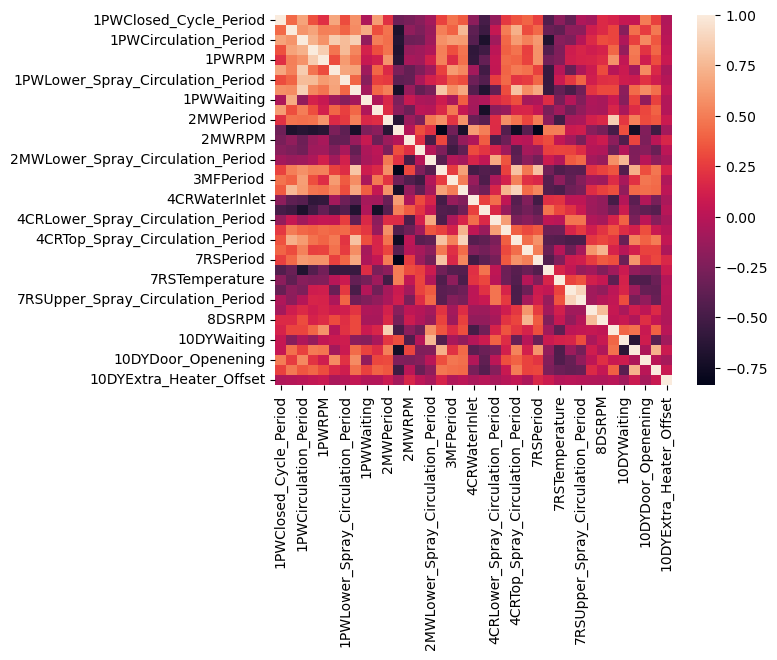

In [27]:
sns.heatmap(cm)

<Axes: >

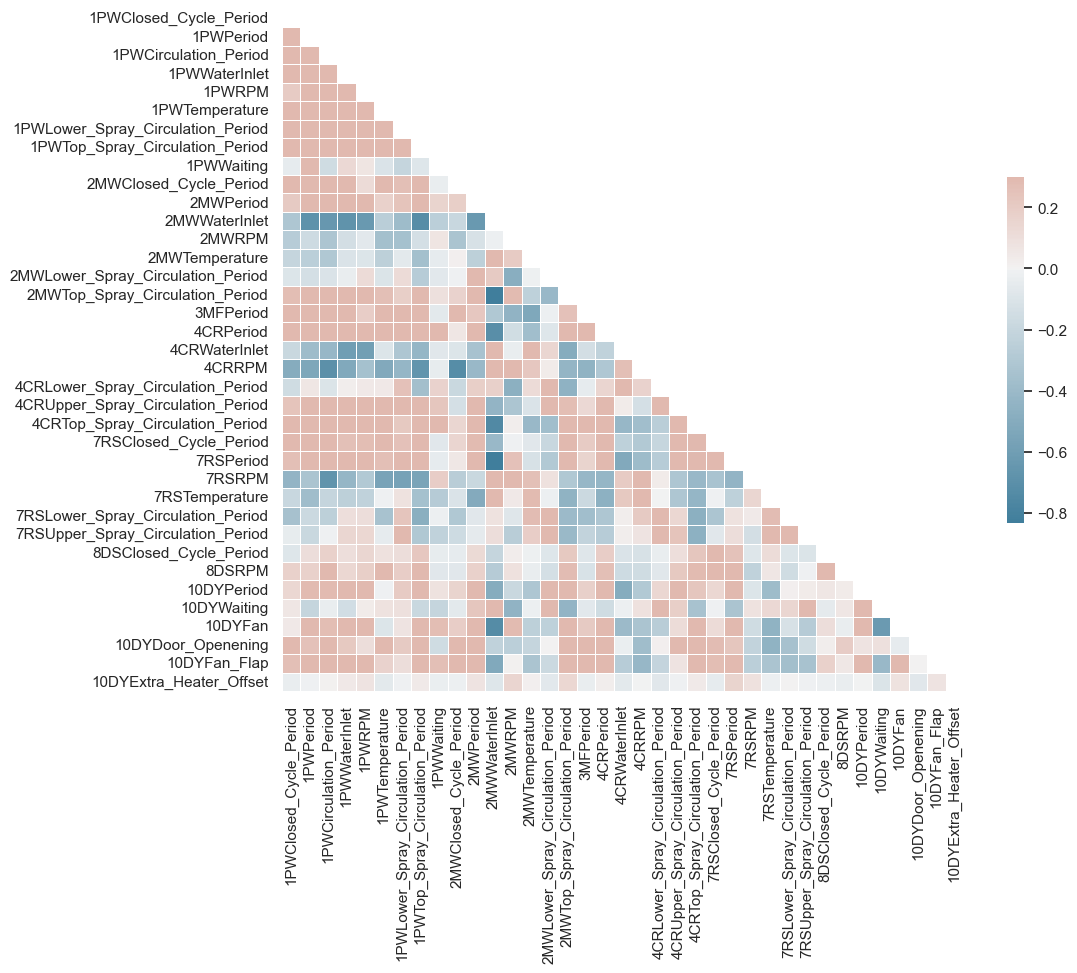

In [28]:
sns.set_theme(style="white")
# Compute the correlation matrix
corr = cm
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
df_ver_3

,1PWClosed_Cycle_Period,1PWPeriod,1PWCirculation_Period,1PWWaterInlet,1PWRPM,1PWTemperature,1PWLower_Spray_Circulation_Period,1PWTop_Spray_Circulation_Period,1PWWaiting,2MWClosed_Cycle_Period,...,7RSLower_Spray_Circulation_Period,7RSUpper_Spray_Circulation_Period,8DSClosed_Cycle_Period,8DSRPM,10DYPeriod,10DYWaiting,10DYFan,10DYDoor_Openening,10DYFan_Flap,10DYExtra_Heater_Offset
3,2,48,43,4.8,2800,53,14.6,7.8,2,0,...,4.5,5.5,0,0,110,50,57,1,30,0
4,3,49,44,4.8,2800,55,14.6,7.8,2,3,...,3.5,5.5,0,0,96,30,63,1,29,0
5,8,54,49,4.8,2800,56,14.6,7.8,2,3,...,4.5,6.5,0,0,113,30,80,1,38,0
6,8,54,49,4.8,2800,55,14.6,7.8,2,3,...,3.5,5.5,0,0,96,30,63,1,29,0
8,8,55,49,7.1,2800,55,14.6,7.8,2,3,...,3.5,5.5,0,0,96,30,63,1,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,23,20,4.6,2800,0,20.0,0.0,0,0,...,24.0,24.0,0,0,103,102,0,0,0,0
150,0,19,16,4.0,2800,0,6.6,3.8,0,0,...,12.0,8.0,0,0,94,20,73,0,0,0
151,0,8,6,3.5,2800,0,6.0,0.0,0,0,...,11.0,11.0,0,0,124,123,0,0,0,0
152,0,19,16,4.0,2800,0,6.5,4.0,0,0,...,8.0,7.0,0,0,109,10,98,0,37,0


In [30]:
y_T.describe()

count     94.000000
mean     196.828723
std       73.080996
min       30.000000
25%      184.683333
50%      224.666667
75%      243.937500
max      297.000000
Name: T, dtype: float64

Text(0.5, 1.0, 'The Statistical Summary of CPI')

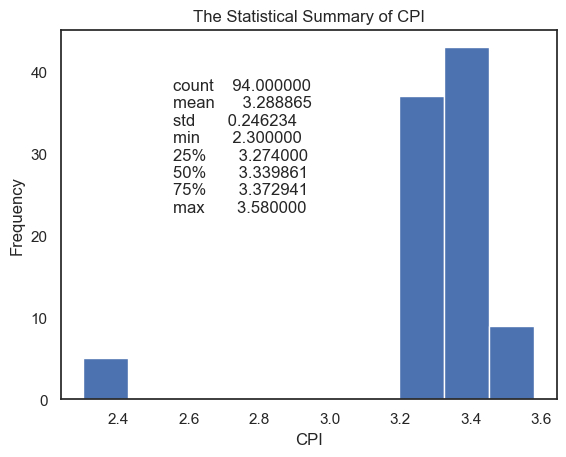

In [31]:
fig, ax = plt.subplots()
ax.hist(y_CPI)
plt.figtext(0.3,0.5, y_CPI.describe().to_string())
plt.xlabel('CPI')
plt.ylabel('Frequency') 
plt.title('The Statistical Summary of CPI')

Text(0.5, 1.0, 'The Statistical Summary of DPI')

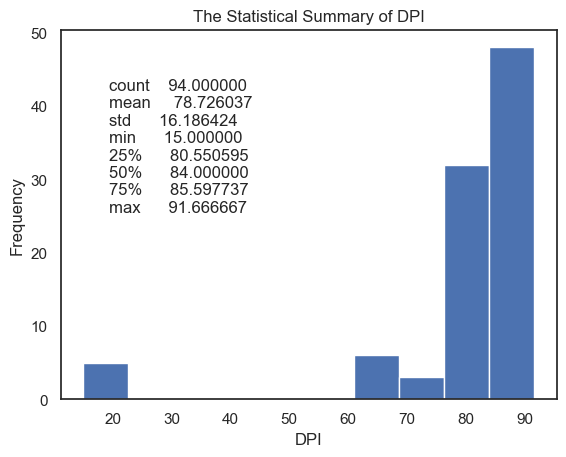

In [32]:
fig, ax = plt.subplots()
ax.hist(y_DPI)
plt.figtext(0.2,0.5, y_DPI.describe().to_string())
plt.xlabel('DPI')
plt.ylabel('Frequency') 
plt.title('The Statistical Summary of DPI')

In [33]:
df_ver_3

,1PWClosed_Cycle_Period,1PWPeriod,1PWCirculation_Period,1PWWaterInlet,1PWRPM,1PWTemperature,1PWLower_Spray_Circulation_Period,1PWTop_Spray_Circulation_Period,1PWWaiting,2MWClosed_Cycle_Period,...,7RSLower_Spray_Circulation_Period,7RSUpper_Spray_Circulation_Period,8DSClosed_Cycle_Period,8DSRPM,10DYPeriod,10DYWaiting,10DYFan,10DYDoor_Openening,10DYFan_Flap,10DYExtra_Heater_Offset
3,2,48,43,4.8,2800,53,14.6,7.8,2,0,...,4.5,5.5,0,0,110,50,57,1,30,0
4,3,49,44,4.8,2800,55,14.6,7.8,2,3,...,3.5,5.5,0,0,96,30,63,1,29,0
5,8,54,49,4.8,2800,56,14.6,7.8,2,3,...,4.5,6.5,0,0,113,30,80,1,38,0
6,8,54,49,4.8,2800,55,14.6,7.8,2,3,...,3.5,5.5,0,0,96,30,63,1,29,0
8,8,55,49,7.1,2800,55,14.6,7.8,2,3,...,3.5,5.5,0,0,96,30,63,1,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,23,20,4.6,2800,0,20.0,0.0,0,0,...,24.0,24.0,0,0,103,102,0,0,0,0
150,0,19,16,4.0,2800,0,6.6,3.8,0,0,...,12.0,8.0,0,0,94,20,73,0,0,0
151,0,8,6,3.5,2800,0,6.0,0.0,0,0,...,11.0,11.0,0,0,124,123,0,0,0,0
152,0,19,16,4.0,2800,0,6.5,4.0,0,0,...,8.0,7.0,0,0,109,10,98,0,37,0


In [34]:
df_ver_3.columns

Index(['1PWClosed_Cycle_Period', '1PWPeriod', '1PWCirculation_Period',
       '1PWWaterInlet', '1PWRPM', '1PWTemperature',
       '1PWLower_Spray_Circulation_Period', '1PWTop_Spray_Circulation_Period',
       '1PWWaiting', '2MWClosed_Cycle_Period', '2MWPeriod', '2MWWaterInlet',
       '2MWRPM', '2MWTemperature', '2MWLower_Spray_Circulation_Period',
       '2MWTop_Spray_Circulation_Period', '3MFPeriod', '4CRPeriod',
       '4CRWaterInlet', '4CRRPM', '4CRLower_Spray_Circulation_Period',
       '4CRUpper_Spray_Circulation_Period', '4CRTop_Spray_Circulation_Period',
       '7RSClosed_Cycle_Period', '7RSPeriod', '7RSRPM', '7RSTemperature',
       '7RSLower_Spray_Circulation_Period',
       '7RSUpper_Spray_Circulation_Period', '8DSClosed_Cycle_Period', '8DSRPM',
       '10DYPeriod', '10DYWaiting', '10DYFan', '10DYDoor_Openening',
       '10DYFan_Flap', '10DYExtra_Heater_Offset'],
      dtype='object')

In [35]:
for x in df_ver_3.columns:
    a=df_ver_0[x]
    print(a.describe())   

count    94.000000
mean      0.755319
std       2.040905
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       8.000000
Name: 1PWClosed_Cycle_Period, dtype: float64
count    94.000000
mean     24.170213
std      23.027631
min       0.000000
25%       0.000000
50%      21.000000
75%      37.750000
max      82.000000
Name: 1PWPeriod, dtype: float64
count    94.000000
mean     16.585106
std      15.744881
min       0.000000
25%       0.000000
50%      16.000000
75%      21.000000
max      59.000000
Name: 1PWCirculation_Period, dtype: float64
count    94.000000
mean      3.162766
std       1.990784
min       0.000000
25%       0.000000
50%       4.000000
75%       4.150000
max       7.300000
Name: 1PWWaterInlet, dtype: float64
count      94.000000
mean     2172.340426
std      1177.787634
min         0.000000
25%      2400.000000
50%      2800.000000
75%      2800.000000
max      3000.000000
Name: 1PWRPM, dtype: float64
count    94.000000
mean     13.319149


In [36]:
# Analysis of a Matrix 
# input matrix name
matrix_name= df_ver_3
X_matrix = matrix_name.to_numpy()
rank = np.linalg.matrix_rank(X_matrix)
print("\nRank:", rank)
XMT=np.transpose(X_matrix)
XTX=np.dot(XMT,X_matrix)
det = np.linalg.det(XTX)
print("\nDeterminant:", det)
Co=np.linalg.cond(X_matrix)
print("\nCondition Number :", Co)


Rank: 37

Determinant: 6.136095301788497e+107

Condition Number : 114393.38196482981


In [41]:
outputs = [ y_CPI, y_DPI , y_EC, y_WC, y_T]
for x in outputs:
    model_LR = LinearRegression()
    model_LR.fit(df_ver_3, x)
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores1 = cross_val_score(model_LR,df_ver_3, x, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    scores3 = cross_val_score(model_LR,df_ver_3, x, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3) ))

 0.161 -803
 8.261 -190
 0.063 67
 0.678 69
 5.763 98


In [40]:
for x in outputs:
    model_LR_1 = KNeighborsRegressor(n_neighbors=3)
    model_LR_1.fit(df_ver_1, x)
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
    scores1 = cross_val_score(model_LR_1,df_ver_1, x, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    scores3 = cross_val_score(model_LR_1,df_ver_1, x, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3) ))

 0.099 6
 4.926 26
 0.070 60
 0.698 66
 10.642 95


In [39]:
st = time.time()
def get_models():
	models = dict()
	models['GBR'] = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
	models['RFR'] = RandomForestRegressor(n_estimators = 100)
	models['XGB']= XGBRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
	return models

def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

def evaluate_model2(model, X, y):
	cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
	scores2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
	return scores2

X=df_ver_3
outputs = [ y_CPI, y_DPI , y_EC, y_WC, y_T]
for y in outputs:
    models = get_models()
    results, names = list(), list()
    for name, model in models.items():
                    scores = evaluate_model(model, X, y)
                    scores2 = evaluate_model2(model, X, y)
                    results.append(scores)
                    names.append(name)
                    print('>%s %.3f %.0f' % (name, -mean(scores), 100*mean(scores2)))
                

et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

>GBR 0.062 64
>RFR 0.065 67
>XGB 0.059 64
>GBR 2.888 79
>RFR 3.086 75
>XGB 2.923 81
>GBR 0.046 80
>RFR 0.048 81
>XGB 0.044 80
>GBR 0.651 75
>RFR 0.623 76
>XGB 0.592 73
>GBR 7.317 98
>RFR 7.681 97
>XGB 7.655 97
Execution time: 14.016955375671387 seconds


DOMAIN EXPERT ANALYSIS

In [42]:
var_DE=['10DYDoor_Openening',
'10DYFan',
'10DYFan_Flap',
'10DYPeriod',
'10DYWaiting',
'1PWCirculation_Period',
'1PWLower_Spray_Circulation_Period',
'1PWPeriod',
'1PWRPM',
'1PWTemperature',
'1PWTop_Spray_Circulation_Period',
'1PWUpper_Spray_Circulation_Period',
'1PWWaiting',
'1PWWaterInlet',
'2MWCirculation_Period',
'2MWLower_Spray_Circulation_Period',
'2MWPeriod',
'2MWRPM',
'2MWTemperature',
'2MWTop_Spray_Circulation_Period',
'2MWUpper_Spray_Circulation_Period',
'2MWWaterInlet',
'4CRCirculation_Period',
'4CRLower_Spray_Circulation_Period',
'4CRPeriod',
'4CRRPM',
'4CRTop_Spray_Circulation_Period',
'4CRUpper_Spray_Circulation_Period',
'4CRWaterInlet',
'7RSCirculation_Period',
'7RSClosed_Cycle_Period',
'7RSLower_Spray_Circulation_Period',
'7RSPeriod',
'7RSRPM',
'7RSTemperature',
'7RSTop_Spray_Circulation_Period',
'7RSUpper_Spray_Circulation_Period',
'7RSWaterInlet']


In [43]:
df_var_DE=df_ver_0[var_DE]

In [44]:
for x in outputs:
    model_LR = LinearRegression()
    model_LR.fit(df_var_DE, x)
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores1 = cross_val_score(model_LR,df_var_DE, x, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    scores3 = cross_val_score(model_LR,df_var_DE, x, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    print(' %.2f %.0f' % (-mean(scores1),  100*mean(scores3) ))

 0.15 -623
 7.70 -455
 0.08 16
 1.08 -34
 5.96 96


In [45]:
for x in outputs:
    model_LR_1 = KNeighborsRegressor(n_neighbors=3)
    model_LR_1.fit(df_var_DE, x)
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
    scores1 = cross_val_score(model_LR_1,df_var_DE, x, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    scores3 = cross_val_score(model_LR_1,df_var_DE, x, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    print(' %.2f %.0f' % (-mean(scores1),  100*mean(scores3) ))

 0.10 6
 4.85 26
 0.07 62
 0.71 65
 10.02 95


Now we have 37 features as a base DATASET II

# Feature Selection Methods

Select k Best f-regression with Linear Regression f_regression
F-value between label/feature for regression tasks.
mutual_info_regression Mutual information for a continuous target.

## freg LR

In [47]:
    st = time.time()
    outputs = [ y_CPI, y_DPI , y_EC, y_WC, y_T]
    for yy in outputs:
        X=df_ver_3
        y=yy
        model = LinearRegression()
        apt= pd.DataFrame(columns=['feature','mae','r2'])
        for k  in range(1, 38, 1):
                from sklearn.feature_selection import SelectKBest, f_regression
                #Select top 2 features based on mutual info regression
                selector = SelectKBest(f_regression, k=k)
                selector.fit(X, y)
                selected_columns=X.columns[selector.get_support()]
                XX = X[selected_columns].copy()       
                model.fit(XX, y)
                cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
                scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
                scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
                new_row = pd.DataFrame({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k}, index=[0])
                apt = pd.concat([new_row,apt.loc[:]]).reset_index(drop=True)
        min_value = apt['mae'].min()
        filtered_apt = apt[apt['mae'] == min_value]
        print(filtered_apt)
    et = time.time()
    elapsed_time = et - st
    print('Execution time:', elapsed_time, 'seconds')

        mae         r2 feature
13  0.09077  44.774148      24
         mae          r2 feature
35  7.475733 -102.517705       2
        mae         r2 feature
7  0.057311  74.530219      30
        mae         r2 feature
7  0.564341  81.022611      30
         mae        r2 feature
25  3.414875  99.54482      12
Execution time: 16.012696743011475 seconds


In [48]:
X=df_ver_3
y=y_CPI
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=24)
selector.fit(X, y)
selected_columns=X.columns[selector.get_support()]
XX = X[selected_columns].copy()
print(XX.columns)

X=df_ver_3
y=y_DPI
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=2)
selector.fit(X, y)
selected_columns=X.columns[selector.get_support()]
XX = X[selected_columns].copy()
print(XX.columns)

X=df_ver_3
y=y_EC
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=30)
selector.fit(X, y)
selected_columns=X.columns[selector.get_support()]
XX = X[selected_columns].copy()
print(XX.columns)

X=df_ver_3
y=y_WC
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=30)
selector.fit(X, y)
selected_columns=X.columns[selector.get_support()]
XX = X[selected_columns].copy()
print(XX.columns)

X=df_ver_3
y=y_T
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=12)
selector.fit(X, y)
selected_columns=X.columns[selector.get_support()]
XX = X[selected_columns].copy()
print(XX.columns)


Index(['1PWPeriod', '1PWCirculation_Period', '1PWWaterInlet', '1PWRPM',
       '1PWTemperature', '1PWLower_Spray_Circulation_Period', '2MWPeriod',
       '2MWWaterInlet', '2MWTemperature', '2MWLower_Spray_Circulation_Period',
       '4CRPeriod', '4CRWaterInlet', '4CRLower_Spray_Circulation_Period',
       '4CRUpper_Spray_Circulation_Period', '7RSClosed_Cycle_Period',
       '7RSPeriod', '7RSRPM', '7RSTemperature',
       '7RSLower_Spray_Circulation_Period',
       '7RSUpper_Spray_Circulation_Period', '8DSRPM', '10DYPeriod',
       '10DYWaiting', '10DYDoor_Openening'],
      dtype='object')
Index(['2MWPeriod', '10DYPeriod'], dtype='object')
Index(['1PWClosed_Cycle_Period', '1PWPeriod', '1PWCirculation_Period',
       '1PWWaterInlet', '1PWRPM', '1PWTemperature',
       '1PWTop_Spray_Circulation_Period', '2MWClosed_Cycle_Period',
       '2MWPeriod', '2MWWaterInlet', '2MWRPM', '2MWTemperature',
       '2MWTop_Spray_Circulation_Period', '3MFPeriod', '4CRPeriod',
       '4CRWaterInlet', '4CR

## freg 3NN

In [49]:
    st = time.time()
    outputs = [ y_CPI, y_DPI , y_EC, y_WC, y_T]
    for yy in outputs:
        X=df_ver_3
        y=yy
        model = KNeighborsRegressor(n_neighbors=3)
        apt= pd.DataFrame(columns=['feature','mae','r2'])
        for k  in range(1, 38, 1):
                from sklearn.feature_selection import SelectKBest, f_regression
                #Select top 2 features based on mutual info regression
                selector = SelectKBest(f_regression, k=k)
                selector.fit(X, y)
                selected_columns=X.columns[selector.get_support()]
                XX = X[selected_columns].copy()       
                model.fit(XX, y)
                cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
                scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
                scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
                new_row = pd.DataFrame({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k}, index=[0])
                apt = pd.concat([new_row,apt.loc[:]]).reset_index(drop=True)
        min_value = apt['mae'].min()
        filtered_apt = apt[apt['mae'] == min_value]
        print(filtered_apt)
    et = time.time()
    elapsed_time = et - st
    print('Execution time:', elapsed_time, 'seconds')

         mae         r2 feature
22  0.046539  81.098411      15
         mae         r2 feature
25  2.115926  83.810325      12
         mae        r2 feature
29  0.045356  87.99272       8
        mae        r2 feature
2  0.696308  66.19368      35
         mae        r2 feature
32  6.585984  97.65268       5
Execution time: 21.011171579360962 seconds


In [50]:
X=df_ver_3
y=y_CPI
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=15)
selector.fit(X, y)
selected_columns=X.columns[selector.get_support()]
XX = X[selected_columns].copy()
print(XX.columns)

X=df_ver_3
y=y_DPI
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=12)
selector.fit(X, y)
selected_columns=X.columns[selector.get_support()]
XX = X[selected_columns].copy()
print(XX.columns)

X=df_ver_3
y=y_EC
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=8)
selector.fit(X, y)
selected_columns=X.columns[selector.get_support()]
XX = X[selected_columns].copy()
print(XX.columns)

X=df_ver_3
y=y_WC
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=35)
selector.fit(X, y)
selected_columns=X.columns[selector.get_support()]
XX = X[selected_columns].copy()
print(XX.columns)

X=df_ver_3
y=y_T
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=5)
selector.fit(X, y)
selected_columns=X.columns[selector.get_support()]
XX = X[selected_columns].copy()
print(XX.columns)


Index(['1PWCirculation_Period', '1PWWaterInlet', '1PWRPM',
       '1PWLower_Spray_Circulation_Period', '2MWPeriod', '2MWTemperature',
       '2MWLower_Spray_Circulation_Period',
       '4CRLower_Spray_Circulation_Period',
       '4CRUpper_Spray_Circulation_Period', '7RSPeriod', '7RSTemperature',
       '7RSLower_Spray_Circulation_Period',
       '7RSUpper_Spray_Circulation_Period', '10DYPeriod', '10DYWaiting'],
      dtype='object')
Index(['1PWPeriod', '1PWCirculation_Period', '1PWWaterInlet', '1PWRPM',
       '1PWLower_Spray_Circulation_Period', '2MWPeriod', '2MWWaterInlet',
       '2MWLower_Spray_Circulation_Period', '4CRPeriod',
       '4CRUpper_Spray_Circulation_Period', '7RSPeriod', '10DYPeriod'],
      dtype='object')
Index(['1PWCirculation_Period', '1PWTop_Spray_Circulation_Period',
       '2MWWaterInlet', '2MWTemperature', '3MFPeriod', '4CRPeriod',
       '4CRTop_Spray_Circulation_Period', '7RSTemperature'],
      dtype='object')
Index(['1PWClosed_Cycle_Period', '1PWPeriod', '1

## freg xgb

In [51]:
    st = time.time()
    outputs = [ y_CPI, y_DPI , y_EC, y_WC, y_T]
    for yy in outputs:
        X=df_ver_3
        y=yy
        model = XGBRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
        apt= pd.DataFrame(columns=['feature','mae','r2'])
        for k  in range(1, 38, 1):
                from sklearn.feature_selection import SelectKBest, f_regression
                #Select top 2 features based on mutual info regression
                selector = SelectKBest(f_regression, k=k)
                selector.fit(X, y)
                selected_columns=X.columns[selector.get_support()]
                XX = X[selected_columns].copy()       
                model.fit(XX, y)
                cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
                scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
                scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
                new_row = pd.DataFrame({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k}, index=[0])
                apt = pd.concat([new_row,apt.loc[:]]).reset_index(drop=True)
        min_value = apt['mae'].min()
        filtered_apt = apt[apt['mae'] == min_value]
        print(filtered_apt)
    et = time.time()
    elapsed_time = et - st
    print('Execution time:', elapsed_time, 'seconds')

         mae         r2 feature
28  0.046158  83.765019       9
         mae         r2 feature
15  2.296816  80.525874      22
         mae         r2 feature
22  0.047258  84.644618      15
        mae       r2 feature
0  0.610228  77.9178      37
         mae         r2 feature
32  5.319783  98.311064       5
Execution time: 50.420528411865234 seconds


In [52]:
X=df_ver_3
y=y_CPI
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=9)
selector.fit(X, y)
selected_columns=X.columns[selector.get_support()]
XX = X[selected_columns].copy()
print(XX.columns)

X=df_ver_3
y=y_DPI
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=22)
selector.fit(X, y)
selected_columns=X.columns[selector.get_support()]
XX = X[selected_columns].copy()
print(XX.columns)

X=df_ver_3
y=y_EC
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=15)
selector.fit(X, y)
selected_columns=X.columns[selector.get_support()]
XX = X[selected_columns].copy()
print(XX.columns)

X=df_ver_3
y=y_WC
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=37)
selector.fit(X, y)
selected_columns=X.columns[selector.get_support()]
XX = X[selected_columns].copy()
print(XX.columns)

X=df_ver_3
y=y_T
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=5)
selector.fit(X, y)
selected_columns=X.columns[selector.get_support()]
XX = X[selected_columns].copy()
print(XX.columns)

Index(['1PWWaterInlet', '1PWRPM', '1PWLower_Spray_Circulation_Period',
       '2MWPeriod', '2MWLower_Spray_Circulation_Period',
       '4CRUpper_Spray_Circulation_Period', '7RSTemperature',
       '7RSUpper_Spray_Circulation_Period', '10DYPeriod'],
      dtype='object')
Index(['1PWPeriod', '1PWCirculation_Period', '1PWWaterInlet', '1PWRPM',
       '1PWLower_Spray_Circulation_Period', '1PWTop_Spray_Circulation_Period',
       '2MWPeriod', '2MWWaterInlet', '2MWLower_Spray_Circulation_Period',
       '2MWTop_Spray_Circulation_Period', '4CRPeriod', '4CRWaterInlet',
       '4CRLower_Spray_Circulation_Period',
       '4CRUpper_Spray_Circulation_Period', '4CRTop_Spray_Circulation_Period',
       '7RSPeriod', '7RSLower_Spray_Circulation_Period',
       '7RSUpper_Spray_Circulation_Period', '10DYPeriod', '10DYWaiting',
       '10DYFan', '10DYDoor_Openening'],
      dtype='object')
Index(['1PWClosed_Cycle_Period', '1PWPeriod', '1PWCirculation_Period',
       '1PWTop_Spray_Circulation_Period', '2M

## freg gbr

In [53]:
    st = time.time()
    outputs = [ y_CPI, y_DPI , y_EC, y_WC, y_T]
    for yy in outputs:
        X=df_ver_3
        y=yy
        model = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
        apt= pd.DataFrame(columns=['feature','mae','r2'])
        for k  in range(1, 38, 1):
                from sklearn.feature_selection import SelectKBest, f_regression
                #Select top 2 features based on mutual info regression
                selector = SelectKBest(f_regression, k=k)
                selector.fit(X, y)
                selected_columns=X.columns[selector.get_support()]
                XX = X[selected_columns].copy()       
                model.fit(XX, y)
                cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
                scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
                scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
                new_row = pd.DataFrame({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k}, index=[0])
                apt = pd.concat([new_row,apt.loc[:]]).reset_index(drop=True)
        min_value = apt['mae'].min()
        filtered_apt = apt[apt['mae'] == min_value]
        print(filtered_apt)
    et = time.time()
    elapsed_time = et - st
    print('Execution time:', elapsed_time, 'seconds')

         mae         r2 feature
28  0.048308  83.771794       9
         mae         r2 feature
31  2.382884  73.165735       6
        mae         r2 feature
24  0.04635  85.651775      13
         mae         r2 feature
18  0.596044  72.092173      19
         mae         r2 feature
31  4.952233  98.567535       6
Execution time: 105.46423649787903 seconds


In [54]:
X=df_ver_3
y=y_CPI
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=9)
selector.fit(X, y)
selected_columns=X.columns[selector.get_support()]
XX = X[selected_columns].copy()
print(XX.columns)

X=df_ver_3
y=y_DPI
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=6)
selector.fit(X, y)
selected_columns=X.columns[selector.get_support()]
XX = X[selected_columns].copy()
print(XX.columns)

X=df_ver_3
y=y_EC
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=13)
selector.fit(X, y)
selected_columns=X.columns[selector.get_support()]
XX = X[selected_columns].copy()
print(XX.columns)

X=df_ver_3
y=y_WC
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=19)
selector.fit(X, y)
selected_columns=X.columns[selector.get_support()]
XX = X[selected_columns].copy()
print(XX.columns)

X=df_ver_3
y=y_T
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=6)
selector.fit(X, y)
selected_columns=X.columns[selector.get_support()]
XX = X[selected_columns].copy()
print(XX.columns)

Index(['1PWWaterInlet', '1PWRPM', '1PWLower_Spray_Circulation_Period',
       '2MWPeriod', '2MWLower_Spray_Circulation_Period',
       '4CRUpper_Spray_Circulation_Period', '7RSTemperature',
       '7RSUpper_Spray_Circulation_Period', '10DYPeriod'],
      dtype='object')
Index(['1PWWaterInlet', '1PWRPM', '2MWPeriod',
       '2MWLower_Spray_Circulation_Period',
       '4CRUpper_Spray_Circulation_Period', '10DYPeriod'],
      dtype='object')
Index(['1PWClosed_Cycle_Period', '1PWPeriod', '1PWCirculation_Period',
       '1PWTop_Spray_Circulation_Period', '2MWWaterInlet', '2MWTemperature',
       '2MWTop_Spray_Circulation_Period', '3MFPeriod', '4CRPeriod', '4CRRPM',
       '4CRTop_Spray_Circulation_Period', '7RSTemperature',
       '7RSLower_Spray_Circulation_Period'],
      dtype='object')
Index(['1PWPeriod', '1PWTop_Spray_Circulation_Period', '2MWPeriod',
       '2MWWaterInlet', '2MWTemperature', '2MWTop_Spray_Circulation_Period',
       '4CRPeriod', '4CRWaterInlet', '4CRRPM',
       '4CRL

# GENETIC FS

## ga lr

In [60]:
X = df_ver_3
y = y_CPI
st = time.time()
estimator = LinearRegression()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=500, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=200,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=LinearRegression()
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
print(model.support_)
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Features: Index(['1PWPeriod', '1PWTop_Spray_Circulation_Period',
       '2MWClosed_Cycle_Period', '2MWWaterInlet', '2MWRPM', '2MWTemperature',
       '2MWTop_Spray_Circulation_Period', '4CRWaterInlet',
       '4CRUpper_Spray_Circulation_Period', '7RSClosed_Cycle_Period', '7RSRPM',
       '7RSTemperature', '7RSLower_Spray_Circulation_Period', '8DSRPM',
       '10DYPeriod', '10DYFan', '10DYDoor_Openening', '10DYFan_Flap'],
      dtype='object')
 0.076 66
[False  True False False False False False  True False  True False  True
  True  True False  True False False  True False False  True False  True
 False  True  True  True False False  True  True False  True  True  True
 False]
Execution time: 36.80470371246338 seconds


In [61]:
X = df_ver_3
y = y_DPI
st = time.time()
estimator = LinearRegression()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=500, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=200,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=LinearRegression()
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Features: Index(['1PWCirculation_Period', '1PWWaterInlet',
       '1PWTop_Spray_Circulation_Period', '2MWClosed_Cycle_Period',
       '2MWPeriod', '2MWWaterInlet', '2MWRPM', '2MWTemperature',
       '2MWTop_Spray_Circulation_Period', '4CRWaterInlet',
       '4CRLower_Spray_Circulation_Period',
       '4CRUpper_Spray_Circulation_Period', '7RSClosed_Cycle_Period', '7RSRPM',
       '7RSTemperature', '7RSLower_Spray_Circulation_Period', '10DYWaiting',
       '10DYFan', '10DYDoor_Openening', '10DYExtra_Heater_Offset'],
      dtype='object')
 4.005 59
Execution time: 39.521186113357544 seconds


In [62]:
X = df_ver_3
y = y_EC
st = time.time()
estimator = LinearRegression()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=500, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=200,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=LinearRegression()
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Features: Index(['1PWWaterInlet', '1PWLower_Spray_Circulation_Period',
       '2MWClosed_Cycle_Period', '2MWPeriod', '2MWTemperature',
       '2MWLower_Spray_Circulation_Period', '2MWTop_Spray_Circulation_Period',
       '4CRPeriod', '4CRWaterInlet', '4CRRPM',
       '4CRUpper_Spray_Circulation_Period', '4CRTop_Spray_Circulation_Period',
       '7RSClosed_Cycle_Period', '7RSTemperature',
       '7RSLower_Spray_Circulation_Period',
       '7RSUpper_Spray_Circulation_Period', '10DYWaiting', '10DYFan',
       '10DYDoor_Openening'],
      dtype='object')
 0.042 89
Execution time: 45.97674107551575 seconds


In [63]:
X = df_ver_3
y = y_WC
st = time.time()
estimator = LinearRegression()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=500, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=200,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=LinearRegression()
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Features: Index(['1PWClosed_Cycle_Period', '1PWWaterInlet', '1PWRPM', '1PWTemperature',
       '2MWClosed_Cycle_Period', '2MWWaterInlet', '2MWRPM', '4CRPeriod',
       '4CRWaterInlet', '4CRTop_Spray_Circulation_Period',
       '7RSClosed_Cycle_Period', '7RSPeriod', '7RSRPM',
       '7RSLower_Spray_Circulation_Period', '8DSClosed_Cycle_Period',
       '10DYPeriod', '10DYExtra_Heater_Offset'],
      dtype='object')
 0.408 89
Execution time: 30.17338514328003 seconds


In [64]:
X = df_ver_3
y = y_T
st = time.time()
estimator = LinearRegression()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=500, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=200,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=LinearRegression()
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Features: Index(['1PWPeriod', '1PWTemperature', '2MWClosed_Cycle_Period', '2MWPeriod',
       '2MWLower_Spray_Circulation_Period', '7RSPeriod', '7RSRPM',
       '8DSClosed_Cycle_Period', '10DYPeriod'],
      dtype='object')
 2.896 100
Execution time: 17.485548734664917 seconds


## ga 3nn

In [66]:
X = df_ver_3
y = y_CPI
st = time.time()
estimator = KNeighborsRegressor(n_neighbors=3)
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=500, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=200,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=KNeighborsRegressor(n_neighbors=3)
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
print(model.support_)
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Features: Index(['1PWClosed_Cycle_Period', '1PWCirculation_Period', '1PWWaterInlet',
       '1PWLower_Spray_Circulation_Period', '1PWWaiting',
       '2MWTop_Spray_Circulation_Period', '4CRWaterInlet',
       '4CRLower_Spray_Circulation_Period', '4CRTop_Spray_Circulation_Period',
       '7RSClosed_Cycle_Period', '7RSPeriod', '7RSTemperature',
       '7RSLower_Spray_Circulation_Period', '8DSRPM', '10DYPeriod',
       '10DYExtra_Heater_Offset'],
      dtype='object')
 0.048 83
[ True False  True  True False False  True False  True False False False
 False False False  True False False  True False  True False  True  True
  True False  True  True False False  True  True False False False False
  True]
Execution time: 89.0826427936554 seconds


In [67]:
X = df_ver_3
y = y_DPI
st = time.time()
estimator = KNeighborsRegressor(n_neighbors=3)
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=500, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=200,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=KNeighborsRegressor(n_neighbors=3)
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
print(model.support_)
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Features: Index(['1PWClosed_Cycle_Period', '1PWRPM', '1PWTemperature',
       '1PWLower_Spray_Circulation_Period', '1PWWaiting', '2MWPeriod',
       '2MWLower_Spray_Circulation_Period', '2MWTop_Spray_Circulation_Period',
       '4CRPeriod', '7RSTemperature', '8DSClosed_Cycle_Period', '10DYWaiting',
       '10DYFan', '10DYFan_Flap', '10DYExtra_Heater_Offset'],
      dtype='object')
 2.106 85
[ True False False False  True  True  True False  True False  True False
 False False  True  True False  True False False False False False False
 False False  True False False  True False False  True  True False  True
  True]
Execution time: 140.85068583488464 seconds


In [68]:
X = df_ver_3
y = y_EC
st = time.time()
estimator = KNeighborsRegressor(n_neighbors=3)
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=500, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=200,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=KNeighborsRegressor(n_neighbors=3)
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
print(model.support_)
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Features: Index(['1PWCirculation_Period', '1PWTemperature', '2MWPeriod',
       '4CRLower_Spray_Circulation_Period',
       '4CRUpper_Spray_Circulation_Period', '7RSTemperature',
       '7RSLower_Spray_Circulation_Period', '10DYPeriod', '10DYWaiting',
       '10DYFan_Flap'],
      dtype='object')
 0.040 90
[False False  True False False  True False False False False  True False
 False False False False False False False False  True  True False False
 False False  True  True False False False  True  True False False  True
 False]
Execution time: 47.72300457954407 seconds


In [69]:
X = df_ver_3
y = y_WC
st = time.time()
estimator = KNeighborsRegressor(n_neighbors=3)
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=500, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=200,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=KNeighborsRegressor(n_neighbors=3)
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
print(model.support_)
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Features: Index(['1PWRPM', '2MWWaterInlet', '2MWLower_Spray_Circulation_Period',
       '2MWTop_Spray_Circulation_Period', '4CRPeriod',
       '7RSClosed_Cycle_Period', '7RSPeriod',
       '7RSUpper_Spray_Circulation_Period', '8DSRPM', '10DYPeriod',
       '10DYExtra_Heater_Offset'],
      dtype='object')
 0.565 80
[False False False False  True False False False False False False  True
 False False  True  True False  True False False False False False  True
  True False False False  True False  True  True False False False False
  True]
Execution time: 85.33478569984436 seconds


In [70]:
X = df_ver_3
y = y_T
st = time.time()
estimator = KNeighborsRegressor(n_neighbors=3)
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=500, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=200,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=KNeighborsRegressor(n_neighbors=3)
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
print(model.support_)
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Features: Index(['1PWClosed_Cycle_Period', '1PWPeriod', '1PWCirculation_Period',
       '1PWWaiting', '2MWClosed_Cycle_Period', '2MWPeriod', '2MWWaterInlet',
       '2MWTemperature', '2MWLower_Spray_Circulation_Period',
       '2MWTop_Spray_Circulation_Period', '4CRPeriod',
       '4CRLower_Spray_Circulation_Period', '4CRTop_Spray_Circulation_Period',
       '8DSClosed_Cycle_Period', '10DYPeriod', '10DYFan'],
      dtype='object')
 5.504 98
[ True  True  True False False False False False  True  True  True  True
 False  True  True  True False  True False False  True False  True False
 False False False False False  True False  True False  True False False
 False]
Execution time: 89.44019103050232 seconds


 # Genetic xgb

In [73]:
X = df_ver_3
y = y_CPI
st = time.time()
estimator = XGBRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=500, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=200,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=XGBRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
print(model.support_)
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Features: Index(['1PWPeriod', '1PWRPM', '1PWLower_Spray_Circulation_Period', '2MWPeriod',
       '2MWWaterInlet', '2MWLower_Spray_Circulation_Period', '3MFPeriod',
       '4CRPeriod', '4CRWaterInlet', '4CRUpper_Spray_Circulation_Period',
       '4CRTop_Spray_Circulation_Period', '7RSRPM', '7RSTemperature',
       '7RSUpper_Spray_Circulation_Period', '10DYDoor_Openening'],
      dtype='object')
 0.046 84
[False  True False False  True False  True False False False  True  True
 False False  True False  True  True  True False False  True  True False
 False  True  True False  True False False False False False  True False
 False]
Execution time: 1492.2963635921478 seconds


In [74]:
X = df_ver_3
y = y_DPI
st = time.time()
estimator = XGBRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=500, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=200,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=XGBRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
print(model.support_)
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Features: Index(['2MWClosed_Cycle_Period', '2MWPeriod',
       '4CRTop_Spray_Circulation_Period', '7RSRPM'],
      dtype='object')
 2.148 78
[False False False False False False False False False  True  True False
 False False False False False False False False False False  True False
 False  True False False False False False False False False False False
 False]
Execution time: 1486.3352105617523 seconds


In [75]:
X = df_ver_3
y = y_EC
st = time.time()
estimator = XGBRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=500, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=200,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=XGBRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
print(model.support_)
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Features: Index(['1PWTemperature', '2MWPeriod', '2MWTop_Spray_Circulation_Period',
       '4CRWaterInlet', '10DYWaiting'],
      dtype='object')
 0.043 87
[False False False False False  True False False False False  True False
 False False False  True False False  True False False False False False
 False False False False False False False False  True False False False
 False]
Execution time: 1196.1255369186401 seconds


In [55]:
X = df_ver_3
y = y_WC
st = time.time()
estimator = XGBRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=500, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=200,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=XGBRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
print(model.support_)
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Features: Index(['1PWClosed_Cycle_Period', '1PWWaterInlet', '1PWRPM', '1PWTemperature',
       '2MWPeriod', '2MWTemperature', '2MWLower_Spray_Circulation_Period',
       '2MWTop_Spray_Circulation_Period', '3MFPeriod', '4CRWaterInlet',
       '4CRTop_Spray_Circulation_Period', '8DSClosed_Cycle_Period',
       '10DYDoor_Openening', '10DYExtra_Heater_Offset'],
      dtype='object')
 0.515 80
[ True False False  True  True  True False False False False  True False
 False  True  True  True  True False  True False False False  True False
 False False False False False  True False False False False  True False
  True]
Execution time: 1516.3068661689758 seconds


In [56]:
X = df_ver_3
y = y_T
st = time.time()
estimator = XGBRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=500, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=200,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=XGBRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
print(model.support_)
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Features: Index(['1PWClosed_Cycle_Period', '1PWPeriod', '1PWCirculation_Period',
       '2MWPeriod', '2MWWaterInlet', '2MWRPM',
       '2MWLower_Spray_Circulation_Period',
       '4CRUpper_Spray_Circulation_Period', '10DYPeriod', '10DYFan'],
      dtype='object')
 5.143 98
[ True  True  True False False False False False False False  True  True
  True False  True False False False False False False  True False False
 False False False False False False False  True False  True False False
 False]
Execution time: 1544.3871710300446 seconds


# Genetic GBR

In [76]:
X = df_ver_3
y = y_CPI
st = time.time()
estimator = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=500, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=200,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
print(model.support_)
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Features: Index(['1PWTemperature', '1PWWaiting', '2MWPeriod', '2MWRPM', '3MFPeriod',
       '4CRPeriod', '4CRRPM', '4CRTop_Spray_Circulation_Period', '7RSRPM',
       '8DSRPM'],
      dtype='object')
 0.046 85
[False False False False False  True False False  True False  True False
  True False False False  True  True False  True False False  True False
 False  True False False False False  True False False False False False
 False]
Execution time: 473.95062160491943 seconds


In [77]:
X = df_ver_3
y = y_DPI
st = time.time()
estimator = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=500, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=200,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
print(model.support_)
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Features: Index(['1PWTemperature', '2MWPeriod', '2MWTop_Spray_Circulation_Period',
       '8DSClosed_Cycle_Period', '10DYFan', '10DYFan_Flap',
       '10DYExtra_Heater_Offset'],
      dtype='object')
 2.180 81
[False False False False False  True False False False False  True False
 False False False  True False False False False False False False False
 False False False False False  True False False False  True False  True
  True]
Execution time: 390.20848083496094 seconds


In [78]:
X = df_ver_3
y = y_EC
st = time.time()
estimator = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=500, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=200,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
print(model.support_)
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Features: Index(['1PWCirculation_Period', '1PWWaterInlet',
       '2MWTop_Spray_Circulation_Period', '4CRWaterInlet', '7RSRPM',
       '10DYPeriod', '10DYWaiting', '10DYExtra_Heater_Offset'],
      dtype='object')
 0.041 89
[False False  True  True False False False False False False False False
 False False False  True False False  True False False False False False
 False  True False False False False False  True  True False False False
  True]
Execution time: 522.704309463501 seconds


In [57]:
X = df_ver_3
y = y_WC
st = time.time()
estimator = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=500, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=200,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
print(model.support_)
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Features: Index(['1PWClosed_Cycle_Period', '1PWRPM', '2MWClosed_Cycle_Period',
       '2MWWaterInlet', '3MFPeriod', '4CRWaterInlet', '4CRRPM',
       '8DSClosed_Cycle_Period', '10DYExtra_Heater_Offset'],
      dtype='object')
 0.469 84
[ True False False False  True False False False False  True False  True
 False False False False  True False  True  True False False False False
 False False False False False  True False False False False False False
  True]
Execution time: 557.9922840595245 seconds


In [58]:
X = df_ver_3
y = y_T
st = time.time()
estimator = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=500, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=200,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
print(model.support_)
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Features: Index(['1PWPeriod', '2MWClosed_Cycle_Period', '2MWPeriod', '2MWRPM',
       '2MWTemperature', '4CRUpper_Spray_Circulation_Period', '10DYPeriod',
       '10DYWaiting', '10DYExtra_Heater_Offset'],
      dtype='object')
 5.096 99
[False  True False False False False False False False  True  True False
  True  True False False False False False False False  True False False
 False False False False False False False  True  True False False False
  True]
Execution time: 745.6773512363434 seconds
